# ETL Credits:

### Libreries

In [73]:
import pandas as pd
import ast
import missingno as msno
import json


### Opening CSV Credits data:

In [74]:
df_credits_csv = pd.read_csv('D:\Data Scientist\CURSADO HENRY DTS09\PI\PI1_PT02\PI_ML_OPS_PT02\Datasets\Credits_datasets\Csvs Credits\credits_1.csv')

In [75]:
# Configurar opciones de visualización
pd.set_option('display.width', None)        # No truncar la anchura de la visualización
pd.set_option('display.max_colwidth', None) # Mostrar toda la longitud de los valores en las celdas

In [76]:
df_credits_csv.head(1)

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg'}, {'cast_id': 19, 'character': 'Hamm (voice)', 'credit_id': '52fe4284c3a36847f8024fa9', 'gender': 2, 'id': 7907, 'name': 'John Ratzenberger', 'order': 5, 'profile_path': '/yGechiKWL6TJDfVE2KPSJYqdMsY.jpg'}, {'cast_id': 20, 'character': 'Bo Peep (voice)', 'credit_id': '52fe4284c3a36847f8024fad', 'gender': 1, 'id': 8873, 'name': 'Annie Potts', 'order': 6, 'profile_path': '/eryXT84RL41jHSJcMy4kS3u9y6w.jpg'}, {'cast_id': 26, 'character': 'Andy (voice)', 'credit_id': '52fe4284c3a36847f8024fc1', 'gender': 0, 'id': 1116442, 'name': 'John Morris', 'order': 7, 'profile_path': '/vYGyvK4LzeaUCoNSHtsuqJUY15M.jpg'}, {'cast_id': 22, 'character': 'Sid (voice)', 'credit_id': '52fe4284c3a36847f8024fb1', 'gender': 2, 'id': 12901, 'name': 'Erik von Detten', 'order': 8, 'profile_path': '/twnF1ZaJ1FUNUuo6xLXwcxjayBE.jpg'}, {'cast_id': 23, 'character': 'Mrs. Davis (voice)', 'credit_id': '52fe4284c3a36847f8024fb5', 'gender': 1, 'id': 12133, 'name': 'Laurie Metcalf', 'order': 9, 'profile_path': '/unMMIT60eoBM2sN2nyR7EZ2BvvD.jpg'}, {'cast_id': 24, 'character': 'Sergeant (voice)', 'credit_id': '52fe4284c3a36847f8024fb9', 'gender': 2, 'id': 8655, 'name': 'R. Lee Ermey', 'order': 10, 'profile_path': '/r8GBqFBjypLUP9VVqDqfZ7wYbSs.jpg'}, {'cast_id': 25, 'character': 'Hannah (voice)', 'credit_id': '52fe4284c3a36847f8024fbd', 'gender': 1, 'id': 12903, 'name': 'Sarah Freeman', 'order': 11, 'profile_path': None}, {'cast_id': 27, 'character': 'TV Announcer (voice)', 'credit_id': '52fe4284c3a36847f8024fc5', 'gender': 2, 'id': 37221, 'name': 'Penn Jillette', 'order': 12, 'profile_path': '/zmAaXUdx12NRsssgHbk1T31j2x9.jpg'}]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [77]:
df_credits_csv.shape

(45476, 3)

In [78]:
# Revertir opciones de visualización a los valores predeterminados
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')


<Axes: >

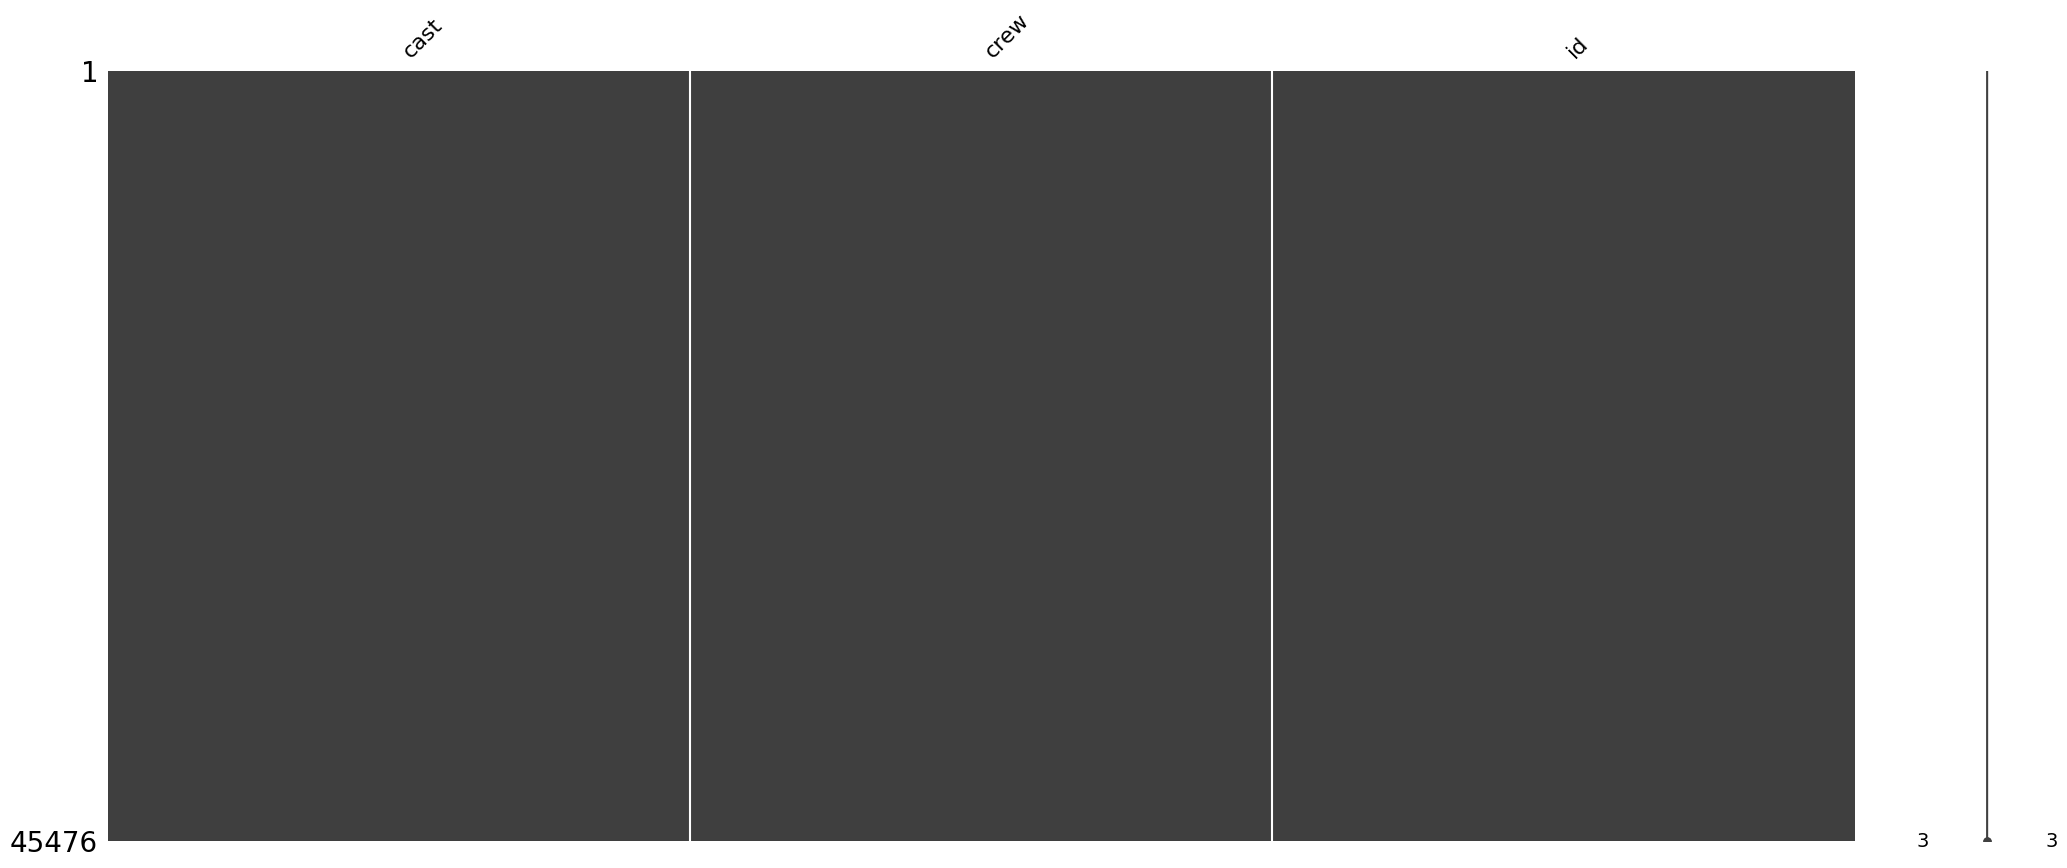

In [79]:
msno.matrix(df_credits_csv)

#### Vamos a tener que explorarlo mas al apestoso csv credits 🤧

In [80]:
df_credits_csv.shape

(45476, 3)

In [81]:
df_credits_csv = df_credits_csv.drop_duplicates()

In [82]:
df_credits_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45439 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45439 non-null  object
 1   crew    45439 non-null  object
 2   id      45439 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


elimino la ultima fila que esta vacia

In [83]:
df_credits_csv = df_credits_csv.drop(df_credits_csv.index[-1])

### Separo la columna id y la guardo aparte para asegurarla, debido a que parece estar ok

In [84]:
df_movie_credits_id = pd.DataFrame()
df_movie_credits_id['id']= df_credits_csv['id']
df_movie_credits_id = df_movie_credits_id.drop_duplicates()
print(type(df_movie_credits_id))

<class 'pandas.core.frame.DataFrame'>


### Continuo Explorando las dos primeras columnas, cast y crew

#### Cast:
##### Al final.. por ahora, no lo utilice, cast posee la info de el elenco de la pelicula, actoresn y que papeles desarrollaron en la pelicula, pero no aporta info significativa para la funcion objetivo get directors...

Dejo codigo comentado para re activar pero no será necesario y lo saco del calculo para ahorrar espacio y tiempo de procesamiento

In [85]:
# df_credits_cast = df_credits_csv[['cast','id']]

# print(df_credits_cast)

In [86]:
# df_credits_cast = df_credits_cast.drop_duplicates()

In [87]:
# print(df_credits_cast.iloc[1:2])

In [88]:
# iteracion = 0
# df_cast_cleaned = pd.DataFrame()

# # Iterar a través de la columna 'cast' en df_credits_cast
# for row in df_credits_cast['cast']:
#     try:
#         # Utilizar json.loads para convertir la representación de cadena en una lista de diccionarios
#         list_of_dicts = json.loads(row.replace("'", "\""))

#         # Verificar si el 'id' de la película existe en la columna 'id' de df_movie_credits_id
#         if df_movie_credits_id['id'].isin([d['id'] for d in list_of_dicts]).any():
#             # Crear el DataFrame con los datos del cast
#             cast_df = pd.DataFrame(list_of_dicts)

#             # Obtener el 'id' de la película de df_movie_credits_id
#             movie_id = df_movie_credits_id['id'].iloc[iteracion]

#             # Agregar el 'movie_id' al DataFrame cast_df
#             cast_df['movie_id'] = movie_id

#             # Unificar los DataFrames utilizando concat
#             df_cast_cleaned = pd.concat([df_cast_cleaned, cast_df], ignore_index=True)

#             # Incrementar el contador de iteración
#             iteracion += 1
#         else:
#             # Si el 'id' de la película no existe en df_movie_credits_id, omitimos esta película
#             pass
#     except json.JSONDecodeError:
#         # Omitir las filas que no se pueden decodificar como JSON
#         pass


In [89]:
# cast_df

In [90]:
# df_cast_cleaned.shape

In [91]:
# df_cast_cleaned

In [92]:
# df_cast_cleaned = df_cast_cleaned.drop(columns=['gender','profile_path','order','credit_id','cast_id'])

In [93]:
# df_cast_cleaned.head(20)

In [94]:
# df_cast_cleaned.shape

In [95]:
# df_cast_cleaned.info()

##### Guardo pickle: df_cast

In [96]:
# # Guardar el DataFrame en formato pickle
# df_cast_cleaned.to_pickle('../../Datasets Cleaned & light/df_cast.pkl')

##### Confirmacion de Diector id:

In [97]:
# # Filtrar el DataFrame por el valor 138 en la columna "id"
# df_filtrado = df_cast_cleaned[df_cast_cleaned["id"] == 138].copy()


In [98]:
# df_filtrado.tail(50)

#### Crew:

In [99]:
df_credits_crew = df_credits_csv['crew']

(df_credits_crew)

0        [{'credit_id': '52fe4284c3a36847f8024f49', 'de...
1        [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...
2        [{'credit_id': '52fe466a9251416c75077a89', 'de...
3        [{'credit_id': '52fe44779251416c91011acb', 'de...
4        [{'credit_id': '52fe44959251416c75039ed7', 'de...
                               ...                        
45470    [{'credit_id': '52fe44439251416c9100a899', 'de...
45471    [{'credit_id': '5894a97d925141426c00818c', 'de...
45472    [{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...
45473    [{'credit_id': '52fe4776c3a368484e0c8387', 'de...
45474    [{'credit_id': '533bccebc3a36844cf0011a7', 'de...
Name: crew, Length: 45438, dtype: object

In [100]:
df_credits_crew = df_credits_crew.drop_duplicates()

In [101]:
df_credits_crew

0        [{'credit_id': '52fe4284c3a36847f8024f49', 'de...
1        [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...
2        [{'credit_id': '52fe466a9251416c75077a89', 'de...
3        [{'credit_id': '52fe44779251416c91011acb', 'de...
4        [{'credit_id': '52fe44959251416c75039ed7', 'de...
                               ...                        
45470    [{'credit_id': '52fe44439251416c9100a899', 'de...
45471    [{'credit_id': '5894a97d925141426c00818c', 'de...
45472    [{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...
45473    [{'credit_id': '52fe4776c3a368484e0c8387', 'de...
45474    [{'credit_id': '533bccebc3a36844cf0011a7', 'de...
Name: crew, Length: 44668, dtype: object

El proceso siguiente tarda aprox 
#### 9 minutos...

In [102]:
import ast
iteracion = 0
df_crew_cleaned = pd.DataFrame()
fallos = 0

for row in df_credits_crew:

    # Obtener el valor de la columna 'crew' del primer registro
    crew_string = df_credits_crew.iloc[iteracion]

    # Convertir el string a una lista de diccionarios usando eval()
    crew_list = ast.literal_eval(crew_string)

    # Check if the crew_list is empty, skip the iteration if it is
    if not crew_list:
        iteracion += 1
        fallos += 1
        continue

    df_crew = pd.DataFrame(crew_list)
    
    #print(f"crew_string: {crew_string}")
    
    # Obtener el 'id' de la película de df_movie_credits_id
    movie_id = df_movie_credits_id['id'].iloc[iteracion]

    # Agregar el 'movie_id' al DataFrame cast_df
    df_crew['movie_id'] = movie_id

    
    #print(f"crew_string: {crew_string}")
    
    
    df_crew = df_crew[df_crew['job'] == 'Director']

    # Unificar los DataFrames utilizando concat
    df_crew_cleaned = pd.concat([df_crew_cleaned, df_crew], ignore_index=True)

    # Incrementar el contador de iteración
    iteracion += 1

    
    

In [103]:
fallos

1

In [104]:
df_crew.tail()


,credit_id,department,gender,id,job,name,profile_path,movie_id
0,533bccebc3a36844cf0011a7,Directing,0,1085341,Director,Yakov Protazanov,/yyjbGdCs2ZN6IlZNCfmBWyuRDlt.jpg,190683


In [105]:
df_crew_cleaned.head()

,credit_id,department,gender,id,job,name,profile_path,movie_id
0,52fe4284c3a36847f8024f49,Directing,2,7879,Director,John Lasseter,/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg,862
1,52fe44bfc3a36847f80a7c7d,Directing,2,4945,Director,Joe Johnston,/fok4jaO62v5IP6hkpaaAcXuw2H.jpg,8844
2,52fe466a9251416c75077a89,Directing,2,26502,Director,Howard Deutch,/68Vae1HkU1NxQZ6KEmuxIpno7c9.jpg,15602
3,52fe44779251416c91011acb,Directing,2,2178,Director,Forest Whitaker,/4pMQkelS5lK661m9Kz3oIxLYiyS.jpg,31357
4,52fe44959251416c75039eef,Directing,2,56106,Director,Charles Shyer,/hnWGd74CbmTcDCFQiJ8SYLazIXW.jpg,11862


In [106]:
df_crew_cleaned.shape

(49007, 8)

In [107]:
df_crew_cleaned = df_crew_cleaned.drop(columns=['gender','profile_path','credit_id','job','department'])

In [108]:
df_crew_cleaned.head()

,id,name,movie_id
0,7879,John Lasseter,862
1,4945,Joe Johnston,8844
2,26502,Howard Deutch,15602
3,2178,Forest Whitaker,31357
4,56106,Charles Shyer,11862


In [109]:
df_crew_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49007 entries, 0 to 49006
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        49007 non-null  int64 
 1   name      49007 non-null  object
 2   movie_id  49007 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


##### Guardo pickle: df_crew (only directors)

In [110]:
# Guardar el DataFrame en formato pickle
df_crew_cleaned.to_pickle('../../Datasets Cleaned & light/df_crew.pkl')

### Seguimos ahora unificando la info:

In [111]:
director_merged_info = df_crew_cleaned

<Axes: >

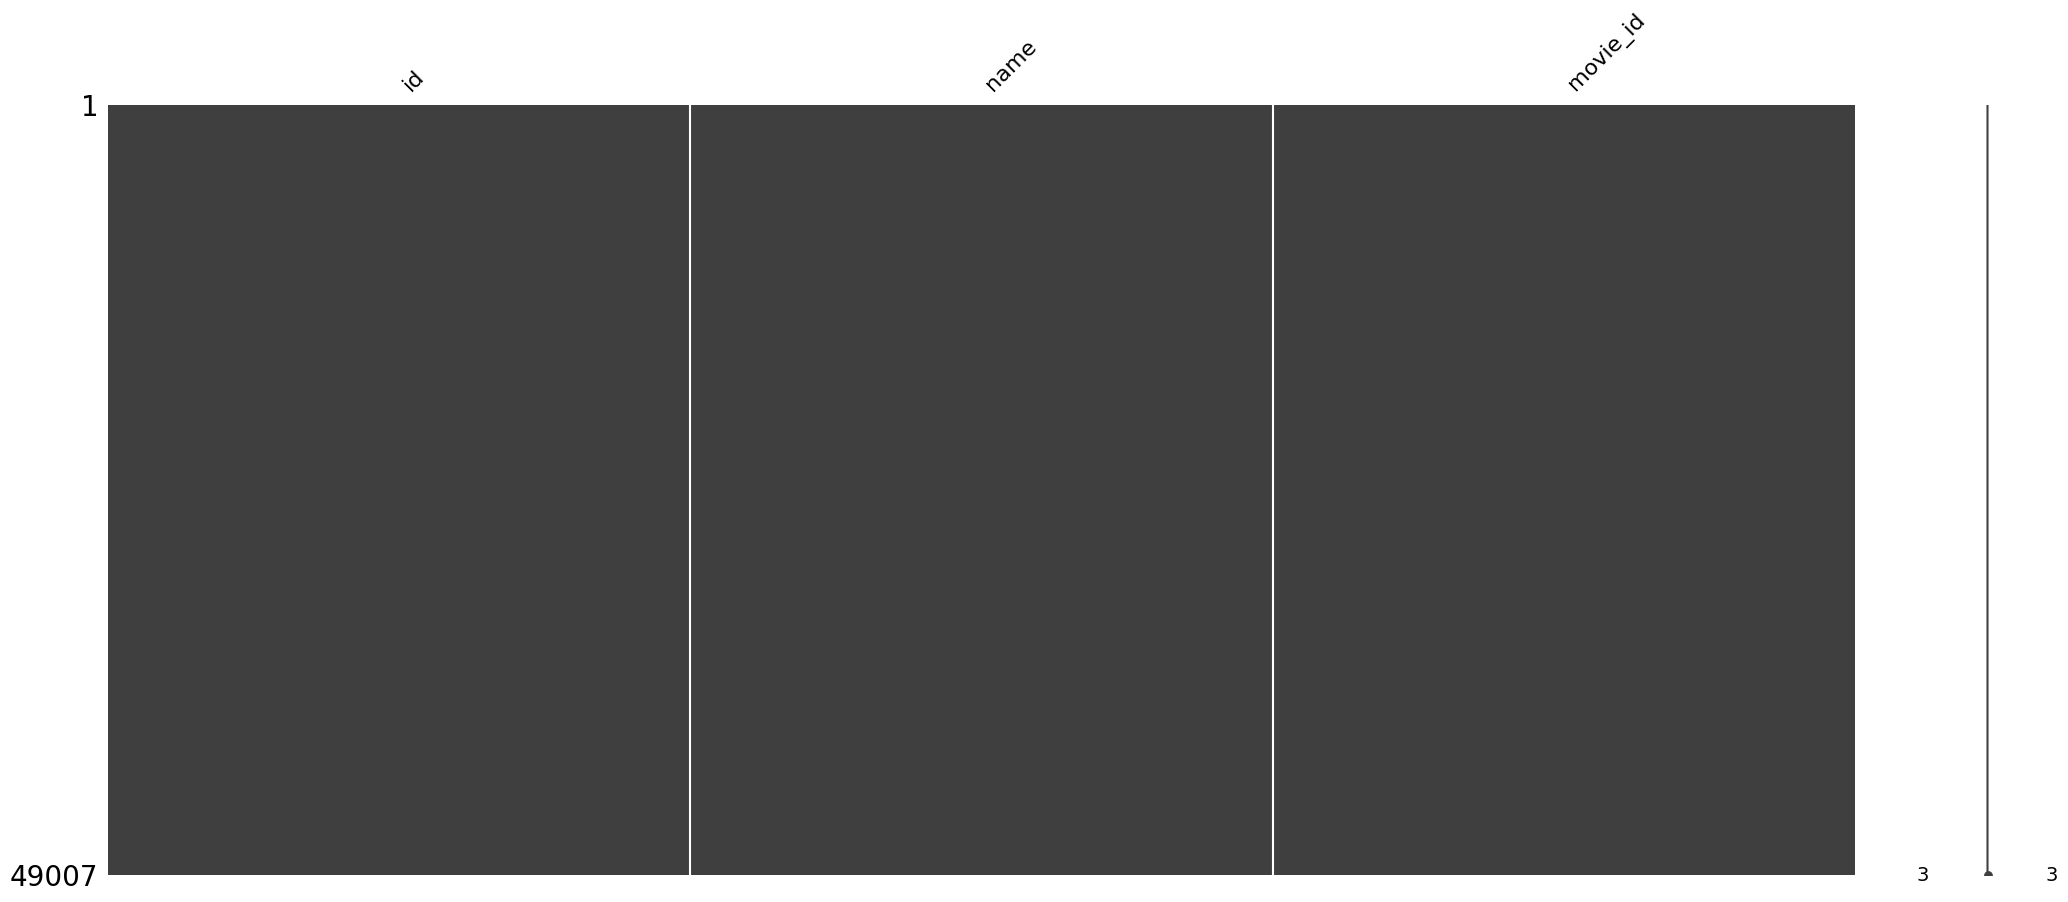

In [112]:
msno.matrix(director_merged_info)

In [113]:
director_merged_info.shape

(49007, 3)

In [114]:
director_merged_info_sin_na = director_merged_info.dropna()

In [115]:
director_merged_info_sin_na.shape

(49007, 3)

In [116]:
director_merged_info_sin_na.head(7)

,id,name,movie_id
0,7879,John Lasseter,862
1,4945,Joe Johnston,8844
2,26502,Howard Deutch,15602
3,2178,Forest Whitaker,31357
4,56106,Charles Shyer,11862
5,638,Michael Mann,949
6,2226,Sydney Pollack,11860


In [117]:
# list_cols_int = ['id_crew','movie_id','id_cast']
# for element in list_cols_int:
#     director_merged_info_sin_na.loc[:, list_cols_int] = director_merged_info_sin_na[list_cols_int].astype(int)
    

In [118]:
# director_merged_info_sin_na.head(5)

In [119]:
# director_merged_info_sin_na.info()

In [120]:
# msno.matrix(director_merged_info_sin_na)

In [121]:
# director_merged_info_sin_na.drop_duplicates()

In [122]:
# director_merged_info_sin_na.head(40)

In [123]:
# director_merged_info_sin_na.shape

#### Algunas verificaciones de concordancia

In [124]:
# Filtrar la fila que contiene el campo "id" igual a 34
fila_id_680 = director_merged_info.loc[director_merged_info_sin_na['name'] == 'Spike Lee']

# Imprimir la fila que cumple la condición
fila_id_680.head()

,id,name,movie_id
163,5281,Spike Lee,20649
359,5281,Spike Lee,34152
658,5281,Spike Lee,2021
1080,5281,Spike Lee,10586
1815,5281,Spike Lee,32144


In [125]:
# Filtrar la fila que contiene el campo "id" igual a 34
fila_id_884 = director_merged_info.loc[director_merged_info_sin_na['movie_id'] == 32144]

# Imprimir la fila que cumple la condición
fila_id_884.head()

,id,name,movie_id
1815,5281,Spike Lee,32144


### Guardo pickle: director_merged_info

In [126]:
# # Guardar el DataFrame en formato pickle
# director_merged_info_sin_na.to_pickle('../../Datasets Cleaned & light/director_merged_info.pkl')

### Creando dataset para ultima funcion:

#### Leer dataset df_movies:

In [127]:
import pandas as pd

# Leer el archivo pickle y guardarlo en un dataframe
df_movies = pd.read_pickle('../../Datasets Cleaned & light/df_movies.pkl')

In [128]:
df_movies.head(1)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,collection_name,genre_ids,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names,release_year,return
0,30000000,862,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81,released,toy story,7.7,5415,toy story collection,"[16, 35, 10751]","['Animation', 'Comedy', 'Family']",[3],['Pixar Animation Studios'],['US'],['United States of America'],['en'],['English'],1995,12.451801


In [129]:
# Renombrar la columna
df_movies.rename(columns={'id': 'movie_id'}, inplace=True)

### Left join, completando df_movies con direcrors of that movies...

In [130]:
# Realizar el left join
df_movies_directors = df_movies.merge(director_merged_info, on='movie_id', how='left')


##### Agrupando df_directors

In [131]:
# grouped_director_info = director_merged_info.groupby('movie_id')['name'].agg(list).reset_index()

In [132]:
# grouped_director_info.head()

______________________________________________

### continue---

In [133]:
df_movies.head(3)

,budget,movie_id,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,collection_name,genre_ids,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names,release_year,return
0,30000000,862,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81,released,toy story,7.7,5415,toy story collection,"[16, 35, 10751]","['Animation', 'Comedy', 'Family']",[3],['Pixar Animation Studios'],['US'],['United States of America'],['en'],['English'],1995,12.451801
1,30000000,862,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81,released,toy story,7.7,5415,toy story collection,"[16, 35, 10751]","['Animation', 'Comedy', 'Family']",[3],['Pixar Animation Studios'],['US'],['United States of America'],['en'],['English'],1995,12.451801
2,30000000,862,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81,released,toy story,7.7,5415,toy story collection,"[16, 35, 10751]","['Animation', 'Comedy', 'Family']",[3],['Pixar Animation Studios'],['US'],['United States of America'],['en'],['English'],1995,12.451801


In [134]:
director_merged_info_sin_na.head(2)

,id,name,movie_id
0,7879,John Lasseter,862
1,4945,Joe Johnston,8844


In [135]:
# # Hacer el left join usando la función merge
# df_movies = df_movies.drop_duplicates()
# director_merged_info_sin_na = director_merged_info_sin_na.drop_duplicates()

# director_merged_info_sin_na = pd.merge(director_merged_info_sin_na, df_movies[['budget', 'popularity', 'revenue', 'title', 'runtime']], on='movie_id', how='left')


<Axes: >

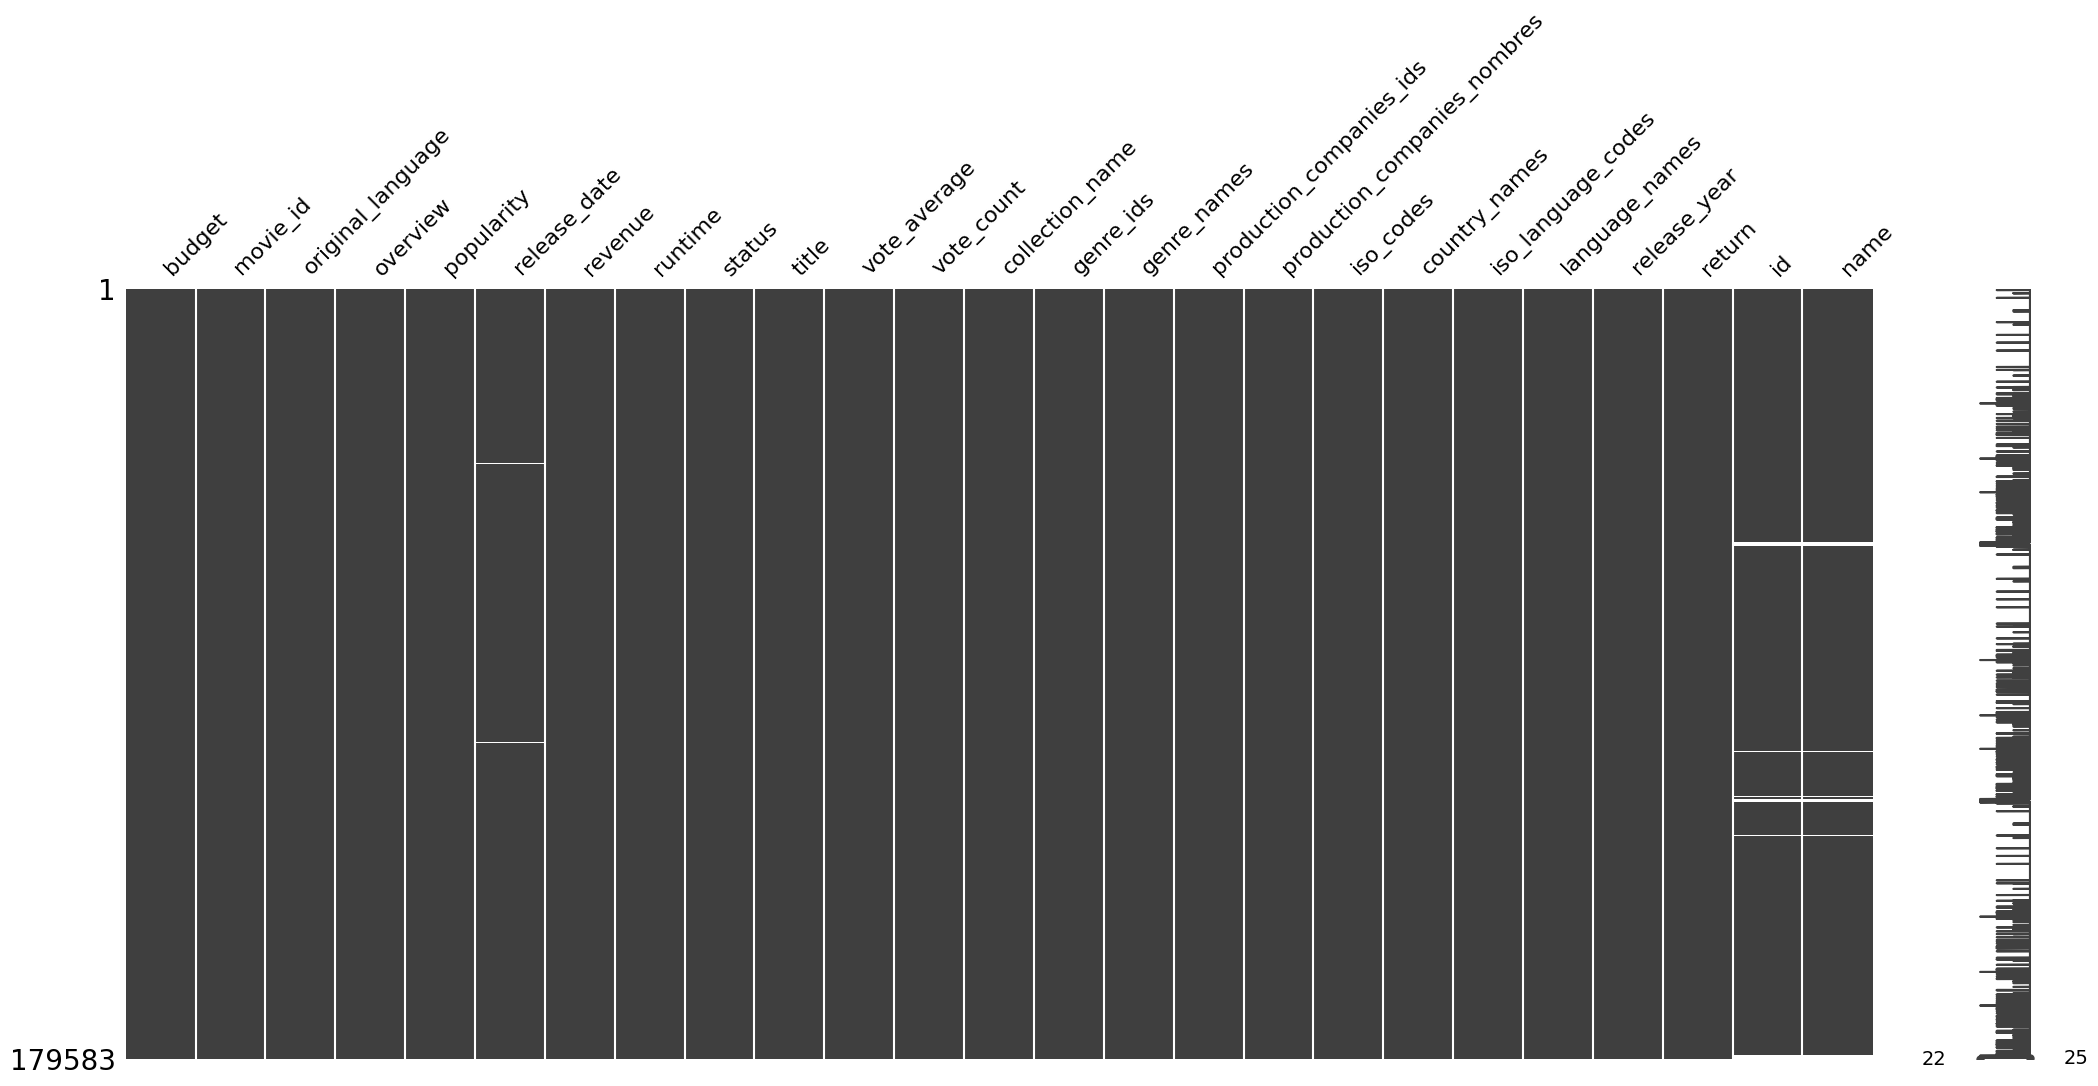

In [136]:
msno.matrix(df_movies_directors)

In [137]:
df_movies_directors = df_movies_directors.drop_duplicates()
df_movies_directors = df_movies_directors.dropna()

In [138]:
print(df_movies_directors.info())

<class 'pandas.core.frame.DataFrame'>
Index: 56889 entries, 0 to 178848
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   budget                        56889 non-null  int32         
 1   movie_id                      56889 non-null  int32         
 2   original_language             56889 non-null  object        
 3   overview                      56889 non-null  object        
 4   popularity                    56889 non-null  float64       
 5   release_date                  56889 non-null  datetime64[ns]
 6   revenue                       56889 non-null  int32         
 7   runtime                       56889 non-null  int32         
 8   status                        56889 non-null  object        
 9   title                         56889 non-null  object        
 10  vote_average                  56889 non-null  float64       
 11  vote_count                    56

In [139]:
df_movies_directors.rename(columns = {'id':'director_id'}, inplace=True)

In [140]:
df_movies_directors['director_id'] = df_movies_directors['director_id'].astype(int)

In [141]:
pd.set_option('display.max_columns', None)

In [145]:
df_movies_directors.head(20)

,budget,movie_id,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,collection_name,genre_ids,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names,release_year,return,director_id,name
0,30000000,862,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81,released,toy story,7.7,5415,toy story collection,"[16, 35, 10751]","['Animation', 'Comedy', 'Family']",[3],['Pixar Animation Studios'],['US'],['United States of America'],['en'],['English'],1995,12.451801,7879,John Lasseter
3,65000000,8844,en,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249,104,released,jumanji,6.9,2413,not part of a collection,"[12, 14, 10751]","['Adventure', 'Fantasy', 'Family']","[559, 2550, 10201]","['TriStar Pictures', 'Teitler Film', 'Intersco...",['US'],['United States of America'],"['en', 'fr']","['English', 'Français']",1995,4.043035,4945,Joe Johnston
4,0,15602,en,a family wedding reignites the ancient feud be...,11.712900,1995-12-22,0,101,released,grumpier old men,6.5,92,grumpy old men collection,"[10749, 35]","['Romance', 'Comedy']","[6194, 19464]","['Warner Bros.', 'Lancaster Gate']",['US'],['United States of America'],['en'],['English'],1995,0.000000,26502,Howard Deutch
7,16000000,31357,en,"cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127,released,waiting to exhale,6.1,34,not part of a collection,"[35, 18, 10749]","['Comedy', 'Drama', 'Romance']",[306],['Twentieth Century Fox Film Corporation'],['US'],['United States of America'],['en'],['English'],1995,5.090760,2178,Forest Whitaker
8,0,11862,en,just when george banks has recovered from his ...,8.387519,1995-02-10,76578911,106,released,father of the bride part ii,5.7,173,father of the bride collection,[35],['Comedy'],"[5842, 9195]","['Sandollar Productions', 'Touchstone Pictures']",['US'],['United States of America'],['en'],['English'],1995,0.000000,56106,Charles Shyer
11,60000000,949,en,"obsessive master thief, neil mccauley leads a ...",17.924927,1995-12-15,187436818,170,released,heat,7.7,1886,not part of a collection,"[28, 80, 18, 53]","['Action', 'Crime', 'Drama', 'Thriller']","[508, 675, 6194]","['Regency Enterprises', 'Forward Pass', 'Warne...",['US'],['United States of America'],"['en', 'es']","['English', 'Español']",1995,3.123947,638,Michael Mann
12,58000000,11860,en,an ugly duckling having undergone a remarkable...,6.677277,1995-12-15,0,127,released,sabrina,6.2,141,not part of a collection,"[35, 10749]","['Comedy', 'Romance']","[4, 258, 932, 5842, 14941, 55873, 58079]","['Paramount Pictures', 'Scott Rudin Production...","['DE', 'US']","['Germany', 'United States of America']","['fr', 'en']","['Français', 'English']",1995,0.000000,2226,Sydney Pollack
13,0,45325,en,"a mischievous young boy, tom sawyer, witnesses...",2.561161,1995-12-22,0,97,released,tom and huck,5.4,45,not part of a collection,"[28, 12, 18, 10751]","['Action', 'Adventure', 'Drama', 'Family']",[2],['Walt Disney Pictures'],['US'],['United States of America'],"['en', 'de']","['English', 'Deutsch']",1995,0.000000,18357,Peter Hewitt
14,35000000,9091,en,international action superstar jean claude van...,5.231580,1995-12-22,64350171,106,released,sudden death,5.5,174,not part of a collection,"[28, 12, 53]","['Action', 'Adventure', 'Thriller']","[33, 21437, 23770]","['Universal Pictures', 'Imperial Entertainment...",['US'],['United States of America'],['en'],['English'],1995,1.838576,37710,Peter Hyams
15,58000000,710,en,james bond must unmask the mysterious head of ...,14.686036,1995-11-16,352194034,130,released,goldeneye,6.6,1194,james bond collection,"[12, 28, 53]","['Adventure', 'Action', 'Thriller']","[60, 7576]","['United Artists', 'Eon Productions']","['GB', 'US']","['United Kingdom', 'United States of America']","['en', 'ru', 'es']","['English', 'P??????', 'Español']",1995,6.072311,10702,Martin Campbell


##### Guardo pickle: df_movies_directors ; para ultima funcion get directors

In [143]:
# Guardar el DataFrame en formato pickle
df_movies_directors.to_pickle('../../Datasets Cleaned & light/df_movies_directors.pkl')